In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   Unnamed: 0  Distance (mm)  Eff w/o motor (%)  Eff w/ motor (%)  Unnamed: 4  \
0         NaN              5               71.1              67.7         NaN   
1         NaN             10               65.1              60.1         NaN   
2         NaN             15               58.3              54.9         NaN   
3         NaN             20               53.5              51.2         NaN   

   Unnamed: 5  Unnamed: 6  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  


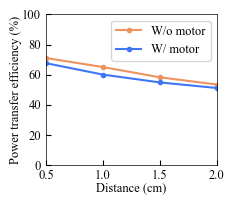

In [ ]:
df = pd.read_csv("eff_for_distance.csv")
print(df.head())


#sns.set()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

plt.rcParams.update({'mathtext.default': 'default',
                         'mathtext.fontset': 'stix',
                         'font.family': 'Times New Roman',
                         'font.size': 9,
                         'xtick.direction': 'in',
                         'ytick.direction': 'in',
                         'axes.axisbelow': True,
                         })

# 図のサイズを設定
width_inch = 6.14 / 2.54
height_inch = 5.36 / 2.54
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# 余白を調整
#plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

# 軸ラベルと範囲を設定
ax.set_xlabel('Distance (cm)', labelpad=0)
ax.set_xlim([0.5, 2])
ax.set_ylabel('Power transfer efficiency (%)', labelpad=0)
ax.set_ylim([0, 100])

    # 枠線の太さをまとめて設定
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# 軸目盛りを設定
plt.xticks(np.arange(0.5, 2.1, step=0.5))
plt.yticks(np.arange(0, 101, step=20))

# グリッドを設定
#plt.grid(color='gray', linestyle='--')

# データをプロット
ax.plot(df['Distance (mm)']/1e1, df['Eff w/o motor (%)'], 'o-', label='W/o motor', color='#EE935F', markersize=3)
ax.plot(df['Distance (mm)']/1e1, df['Eff w/ motor (%)'], 'o-', label='W/ motor', color='#4176F6', markersize=3)

# 凡例を表示
plt.legend()

# タイトレイアウト
plt.tight_layout()

# 図を保存
plt.savefig('Eff_for_distance.svg')

# 図を表示
plt.show()

   Unnamed: 0  Radius (mm)  Eff (%)  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         NaN           30     57.6         NaN         NaN         NaN   
1         NaN           60     63.3         NaN         NaN         NaN   
2         NaN           90     62.1         NaN         NaN         NaN   
3         NaN          120     60.1         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
   Unnamed: 0  Radius (mm)  Eff (%)  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         NaN           30     52.4         NaN         NaN         NaN   
1         NaN           60     58.3         NaN         NaN         NaN   
2         NaN           90     57.7         NaN         NaN         NaN   
3         NaN          120     60.1         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  


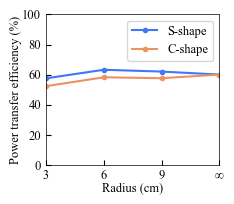

In [ ]:
df_s = pd.read_csv("eff_for_s-bending.csv")
df_c = pd.read_csv("eff_for_c-bending.csv")
print(df_s.head())
print(df_c.head())



plt.rcParams.update({'mathtext.default': 'default',
                         'mathtext.fontset': 'stix',
                         'font.family': 'Times New Roman',
                         'font.size': 9,
                         'xtick.direction': 'in',
                         'ytick.direction': 'in',
                         'axes.axisbelow': True,
                         })

# 図のサイズを設定
width_inch = 6.14 / 2.54
height_inch = 5.36 / 2.54
fig, ax = plt.subplots(figsize=(width_inch, height_inch))


# 軸ラベルと範囲を設定
ax.set_xlabel('Radius (cm)', labelpad=0)
ax.set_xlim([3, 12])
ax.set_ylabel('Power transfer efficiency (%)', labelpad=0)
ax.set_ylim([0, 100])

    # 枠線の太さをまとめて設定
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# 軸目盛りを設定
plt.xticks(np.arange(3, 12+1, step=3))
plt.yticks(np.arange(0, 101, step=20))

# グリッドを設定
#plt.grid(color='gray', linestyle='--')

# データをプロット
ax.plot(df_s['Radius (mm)']/1e1, df_s['Eff (%)'], 'o-', label='S-shape', color='#4176F6', markersize=3)
ax.plot(df_c['Radius (mm)']/1e1, df_c['Eff (%)'], 'o-', label='C-shape', color='#EE935F', markersize=3)

ax.set_xticklabels(['3', '6', '9', '$\infty$'])


# 凡例を表示
plt.legend()

# タイトレイアウト
plt.tight_layout()

# 図を保存
plt.savefig('Eff_for_bending.svg')

# 図を表示
plt.show()



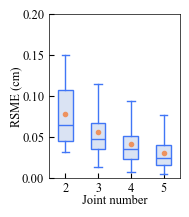

In [90]:
plt.rcParams.update({'mathtext.default': 'default',
                         'mathtext.fontset': 'stix',
                         'font.family': 'Times New Roman',
                         'font.size': 9,
                         'xtick.direction': 'in',
                         'ytick.direction': 'in',
                         'axes.axisbelow': True,
                         })
# エクセルファイルを読み込み、データフレームに格納
def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

# 1つのグラフに5つの箱ひげ図を作成
def create_boxplot(data, whisker_color, mean_color, fill_color, titles=None):
    if data.shape[1] < 4:
        print("エラー: データフレームに4列以上のデータが必要です。")
        return

    # 各列データをタプルに変換
    box_data = tuple(data.iloc[:, i].dropna() for i in range(4))

    # 図のサイズを設定
    width_inch = 5 / 2.54
    height_inch = 5.7 / 2.54
    fig, ax = plt.subplots(figsize=(width_inch, height_inch))

    # 枠線の太さをまとめて設定
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # すべての枠線を太さ2に設定
    box = ax.boxplot(box_data, patch_artist=True, showmeans=True,
                     meanprops=dict(marker='o', markerfacecolor=mean_color, markersize=3, markeredgecolor=mean_color),
                     boxprops=dict(color=whisker_color,facecolor=fill_color),
                     whiskerprops=dict(color=whisker_color),
                     capprops=dict(color=whisker_color),
                     medianprops=dict(color=whisker_color),
                     showfliers=False)  # 中央値の色は緑


    # x軸のラベルを設定
    ax.set_xticklabels(titles if titles else ['Column 1', 'Column 2', 'Column 3', 'Column 4'])
    ax.set_xlabel('Joint number', labelpad=0)
    ax.set_ylabel('RSME (cm)', labelpad=0)
    ax.set_ylim([0, 0.2])
    plt.tight_layout()
    plt.savefig('Error_for_serpenoid.svg')
    plt.show()

# ファイルパスと各設定を指定
file_path = '5arcs_error_for_box-and-hide.csv'  # エクセルファイルのパス
titles = ['2', '3', '4', '5']
whisker_color = '#4176F6'
mean_color = '#EE935F'
fill_color = (218/255,227/255,243/255)

# データを読み込み、箱ひげ図を作成
data = read_csv(file_path)
create_boxplot(data, whisker_color=whisker_color, mean_color=mean_color,fill_color=fill_color, titles=titles)